## **<span style="color:#0918D5 ;">Introduction</span>**
Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

## **<span style="color:#0918D5 ;">Data Dictionary</span>**
- **<span style="color:#0918D5 ;">PassengerId</span>** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- **<span style="color:#0918D5 ;">HomePlanet</span>** - The planet the passenger departed from, typically their planet of permanent residence.
- **<span style="color:#0918D5 ;">CryoSleep</span>** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- **<span style="color:#0918D5 ;">Cabin</span>** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- **<span style="color:#0918D5 ;">Destination</span>** - The planet the passenger will be debarking to.
- **<span style="color:#0918D5 ;">Age</span>** - The age of the passenger.
- **<span style="color:#0918D5 ;">VIP</span>** - Whether the passenger has paid for special VIP service during the voyage.
- **<span style="color:#0918D5 ;">RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</span>** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- **<span style="color:#0918D5 ;">Name</span>** - The first and last names of the passenger.
- **<span style="color:#0918D5 ;">Transported</span>** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## **<span style="color:#0918D5 ;">Importing Required Libraries</span>**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn import preprocessing

import statsmodels.api as sm

## **<span style="color:#0918D5 ;">Loading Data</span>**

In [2]:
df = pd.read_csv('../input/spaceship-titanic/train.csv')
df_test = pd.read_csv('../input/spaceship-titanic/test.csv')
sample_submission = pd.read_csv('../input/spaceship-titanic/sample_submission.csv')

df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## **<span style="color:#0918D5 ;">Information about data</span>**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
df.shape

(8693, 14)

## **<span style="color:#0918D5 ;">Checking for missing values</span>**

In [5]:
display(((df.isnull().sum() / df.shape[0])*100).to_frame().rename({0: 'Missing Values % (Train)'}, axis = 1).style.background_gradient('gist_heat_r'))
display(((df_test.isnull().sum() / df_test.shape[0])*100).to_frame().rename({0: 'Missing Values % (Test)'}, axis = 1).style.background_gradient('gist_heat_r'))

,Missing Values % (Train)
PassengerId,0.000000
HomePlanet,2.312205
CryoSleep,2.496261
Cabin,2.289198
Destination,2.093639
Age,2.059128
VIP,2.335212
RoomService,2.082135
FoodCourt,2.105142
ShoppingMall,2.392730


,Missing Values % (Test)
PassengerId,0.000000
HomePlanet,2.034136
CryoSleep,2.174421
Cabin,2.338087
Destination,2.151040
Age,2.127660
VIP,2.174421
RoomService,1.917232
FoodCourt,2.478373
ShoppingMall,2.291326


## **<span style="color:#0918D5 ;">Visualizing missing values</span>**

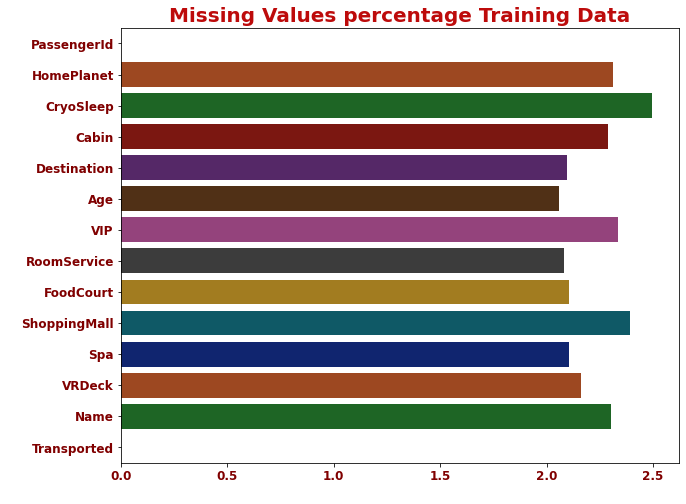

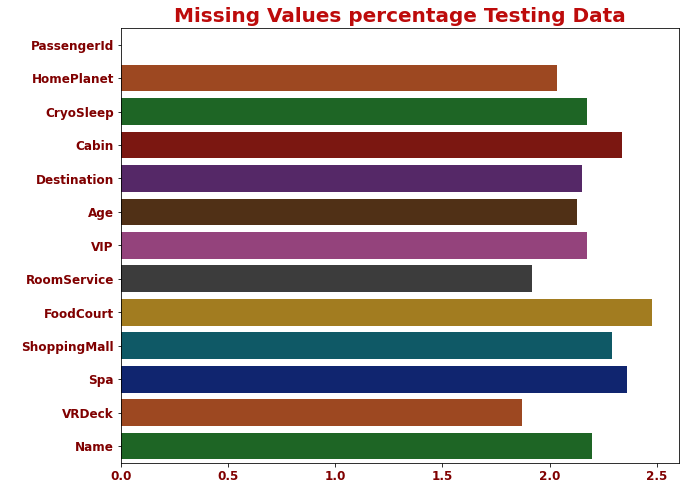

In [6]:
missing_val_df = ((df.isnull().sum() / df.shape[0])*100).to_frame().reset_index().rename({'index': 'columns', 0: 'Missing Values percentage'}, axis = 1)

plt.figure(figsize = (10,8))
sns.barplot(data = missing_val_df, x = 'Missing Values percentage', y = 'columns',palette='dark')
plt.title('Missing Values percentage Training Data', fontsize = 20, fontweight = 'bold', color = '#bd0b0b')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(fontsize = 12, fontweight = 'bold', color = 'maroon')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'maroon');


missing_val_df_test = ((df_test.isnull().sum() / df_test.shape[0])*100).to_frame().reset_index().rename({'index': 'columns', 0: 'Missing Values percentage'}, axis = 1)

plt.figure(figsize = (10,8))
sns.barplot(data = missing_val_df_test, x = 'Missing Values percentage', y = 'columns',palette='dark')
plt.title('Missing Values percentage Testing Data', fontsize = 20, fontweight = 'bold', color = '#bd0b0b')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(fontsize = 12, fontweight = 'bold', color = 'maroon')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'maroon');

### **<span style="color:#0918D5 ;">Observations:</span>**
- Missing values doesnt seem to follow a pattern in training and testing datasets.
- In training data: **CryoSleep** and **Age** has highest and second lowest missing values percentages. **PassengerId** and **Transported** doesn't have any missing values (lowest %age).
- In testing data: **FoodCourt** and **VRDeck** has highest and second lowest missing values percentages. **PassengerId** doesn't have any missing values (lowest %age).

## **<span style="color:#0918D5 ;">Distribution of Target variable</span>**

,Transported
True,0.503624
False,0.496376


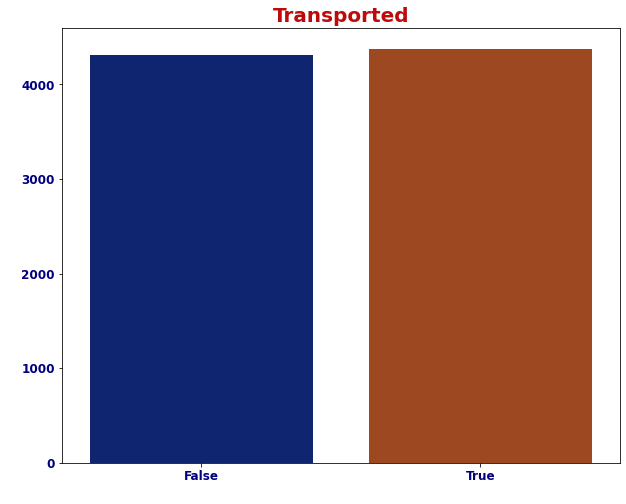

In [7]:
display(df.Transported.value_counts(normalize = True).to_frame().style.background_gradient('copper_r'))

plt.figure(figsize = (10,8))
sns.countplot(data = df, x = 'Transported', palette='dark')
plt.title('Transported', fontsize = 20, fontweight = 'bold', color = '#bd0b0b')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'navy');

### **<span style="color:#0918D5 ;">Observations:</span>**
- Transported (True) = 50.4%  
- Transported (False) = 49.6%

- Data (when rounded off for classes percentage) is balanced (50%-50%). Hence we can use **Accuracy** as our final metrics to assess the model. 

## **<span style="color:#0918D5 ;">Missing values imputation</span>**
- Categorical : Group by + Mode
- Float: Iterative Imputer

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## **<span style="color:#0918D5 ;">Check Caridnality of Categofical variables</span>**


In [9]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
for col in cat_cols:
    print(f"Number of Rows: {df.shape[0]}")
    print(col)
    print(f"First 5 Unique Values: {df[col].unique()[:5]}")
    print(f"Number of Unique Values: {df[col].nunique()}")
    print(f"Value Counts: \n{df[col].value_counts(dropna= False).head(5)}")
    print("="*50)

Number of Rows: 8693
PassengerId
First 5 Unique Values: ['0001_01' '0002_01' '0003_01' '0003_02' '0004_01']
Number of Unique Values: 8693
Value Counts: 
0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
Name: PassengerId, dtype: int64
Number of Rows: 8693
HomePlanet
First 5 Unique Values: ['Europa' 'Earth' 'Mars' nan]
Number of Unique Values: 3
Value Counts: 
Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: HomePlanet, dtype: int64
Number of Rows: 8693
CryoSleep
First 5 Unique Values: [False True nan]
Number of Unique Values: 2
Value Counts: 
False    5439
True     3037
NaN       217
Name: CryoSleep, dtype: int64
Number of Rows: 8693
Cabin
First 5 Unique Values: ['B/0/P' 'F/0/S' 'A/0/S' 'F/1/S' 'F/0/P']
Number of Unique Values: 6560
Value Counts: 
NaN        199
G/734/S      8
C/137/S      7
B/201/P      7
G/109/P      7
Name: Cabin, dtype: int64
Number of Rows: 8693
Destination
First 5 Unique Values: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Num

### **<span style="color:#0918D5 ;">Observations:</span>**
- Looks like people travelling to **PSO J318.5-22** and who were not VIP were confined to their cabins (49.6%). May be isolated ?


In [10]:
df[['CryoSleep', 'Destination', 'VIP']].groupby(['Destination', 'VIP'])[['CryoSleep']].agg(['count', 'mean', 'median', pd.Series.mode])

CryoSleep                        
                        count      mean median   mode
Destination   VIP                                    
55 Cancri e   False      1652  0.427966    0.0  False
              True         62  0.193548    0.0  False
PSO J318.5-22 False       739  0.507442    1.0   True
              True         18  0.000000    0.0  False
TRAPPIST-1e   False      5521  0.328201    0.0  False
              True        114  0.078947    0.0  False

## **<span style="color:#0918D5 ;">Combining train and test dataset</span>**
- Plan here is to get mode from maximum data available for categorical variables and 
- Get best prediction of missing values using MICE methodology (using iterative imputer). To make sure data leakage doesn't happen:
    - Removed target variable when using iterative imputer
    - Make copy of the dataset and perform missing imputation in copied dataset and take only required columns from the copied set. 

In [11]:
df['isTrain'] = True
df_test['isTrain'] = False
tt = pd.concat([df, df_test]).reset_index(drop = True).copy()
tt.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,isTrain
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,True
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True


## **<span style="color:#0918D5 ;">Imputing Missing values in Categorical columns</span>**

In [12]:
"""Mode for Destination and VIP """
tt['Destination'] = tt['Destination'].fillna(tt['Destination'].mode()[0])
tt['VIP'] = tt['VIP'].fillna(tt['VIP'].mode()[0])

"""For CyroSleep, Cabin, HomePlanet: Mode after Grouping by Destination and VIP"""
tt['CryoSleep'] = tt.groupby(['Destination', 'VIP'])['CryoSleep'].transform(lambda x: x.fillna(x.mode()[0]))
tt['Cabin'] = tt.groupby(['CryoSleep', 'VIP'])['Cabin'].transform(lambda x: x.fillna(x.mode()[0]))
tt['HomePlanet'] = tt.groupby(['CryoSleep', 'VIP'])['HomePlanet'].transform(lambda x: x.fillna(x.mode()[0]))

"""For missing Names: Used keyword- Missing"""
tt['Name'] = tt['Name'].fillna("MISSING")

## **<span style="color:#0918D5 ;">Imputing Missing values in Numerical columns</span>**

In [13]:
"""Created List of columns according to the data-types"""
useful_cols = [col for col in tt.columns if col not in ['PassengerId','Name','isTrain','Transported']]
cat_cols = [col for col in useful_cols if tt[col].dtype == 'object']
bool_cols = ['VIP', 'CryoSleep']
col_num = [col for col in useful_cols if col not in (cat_cols+bool_cols)]

"""Preprocessing for Using Iterative Imputer"""
comb_df = tt.copy()                # Making copy of combined data
le = preprocessing.LabelEncoder()  # Label Encoding Categrorical columns
for i in comb_df[cat_cols].columns:
    comb_df[i] = le.fit_transform(comb_df[i])

"""Imputing missing values of Float-type data using Iterative Imputer"""
it_imputer = IterativeImputer(max_iter=1000)
iterimp = it_imputer.fit_transform(comb_df[useful_cols])
imp_df = pd.DataFrame(iterimp, columns=comb_df[useful_cols].columns)

for col in comb_df[col_num].columns:
    tt[col] = imp_df[col]

tt.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,isTrain
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,True
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True


In [14]:
"""Taking out Training and Testing set from combined Dataset."""
train = tt[tt.isTrain == True].drop('isTrain', axis= 1)
test = tt[tt.isTrain != True].drop(['isTrain','Transported'], axis =1)

"""Checking missing values"""
print(f"Missing values in Training Set: {train.isnull().sum().sum()} \
\nMissing values in Test Set: {test.isnull().sum().sum()}")

Missing values in Training Set: 0 
Missing values in Test Set: 0


## **<span style="color:#0918D5 ;">Describing the Imputed Dataset (Training)</span>**

In [15]:
train.describe().style.background_gradient(cmap="Pastel1")

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.826641,224.121348,457.246520,172.672515,310.824444,303.780692
std,14.350416,660.770003,1596.546806,598.025604,1125.631974,1133.829409
min,0.000000,-400.894576,-578.453883,-105.249201,-337.810234,-81.354350
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,63.000000,103.000000,34.000000,80.000000,62.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## **<span style="color:#0918D5 ;">Exploratory Data Analysis (EDA)</span>**
- **Univariate Analysis**
- **Bivariate Analysis**

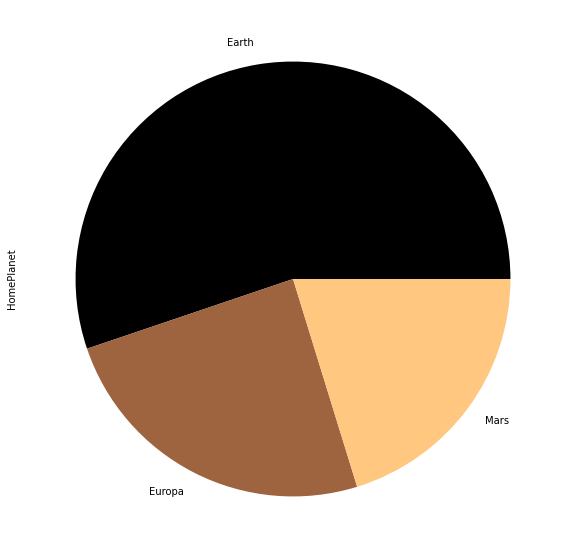

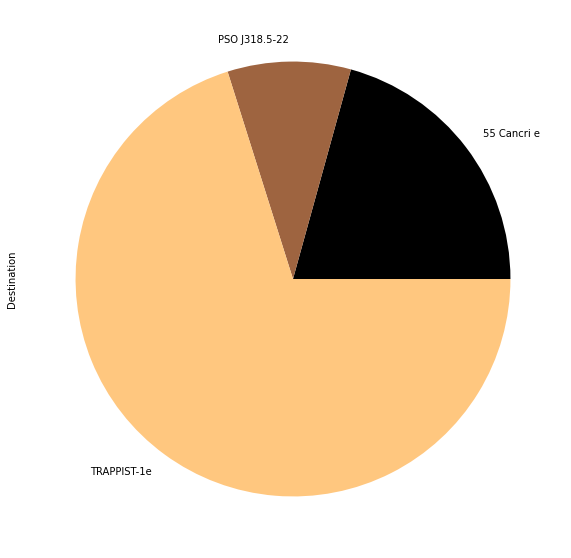

<Figure size 432x288 with 0 Axes>

In [16]:
"""Univariate Analysis on Categorical Columns"""
"""Pie Chart of Pregnencies and Outcome"""
for i in ['HomePlanet', 'Destination']:
    train.groupby(i)[i].count().plot.pie(y = i, figsize=(10, 10), cmap = 'copper')
    plt.show()
    plt.tight_layout();

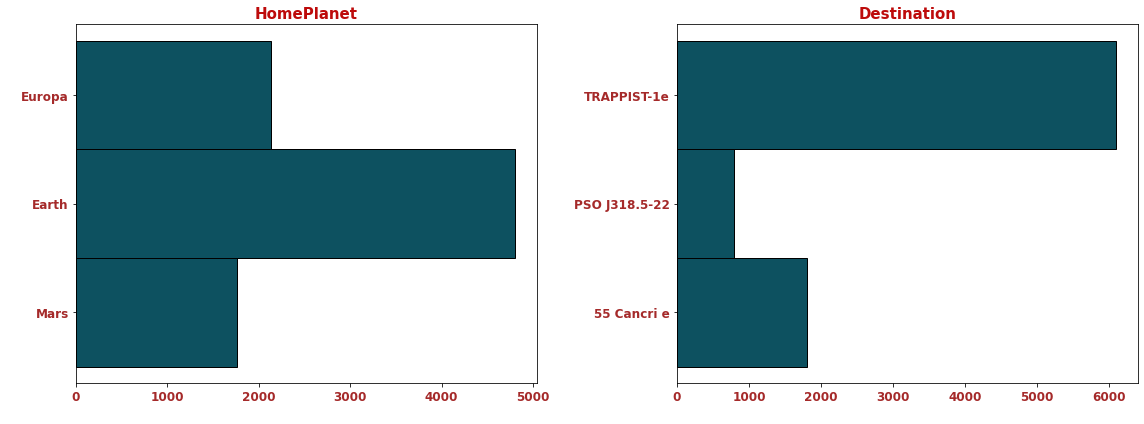

In [17]:
"""Historgram of categorical variables"""
plt.figure(figsize = (16,6))
for i, col in enumerate(['HomePlanet', 'Destination']):
    plt.subplot(1,2,(i+1))
    sns.histplot(y = col,  data = train, color = '#0D5160', alpha =1 )
    plt.xticks(rotation = 0)
    plt.title(col, fontsize = 15, fontweight = 'bold', color = '#bd0b0b')
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.xticks(fontsize = 12, fontweight = 'bold', color = 'brown')
    plt.yticks(fontsize = 12, fontweight = 'bold', color = 'brown')
    plt.tight_layout();

### **<span style="color:#0918D5 ;">Observations:</span>**
- Looks like in future living in mars is very much possible. As usual People of Earth are exploring places :D
- Many passangers were headed to TRAPPIST-1e, wonder what planet or place would that be.


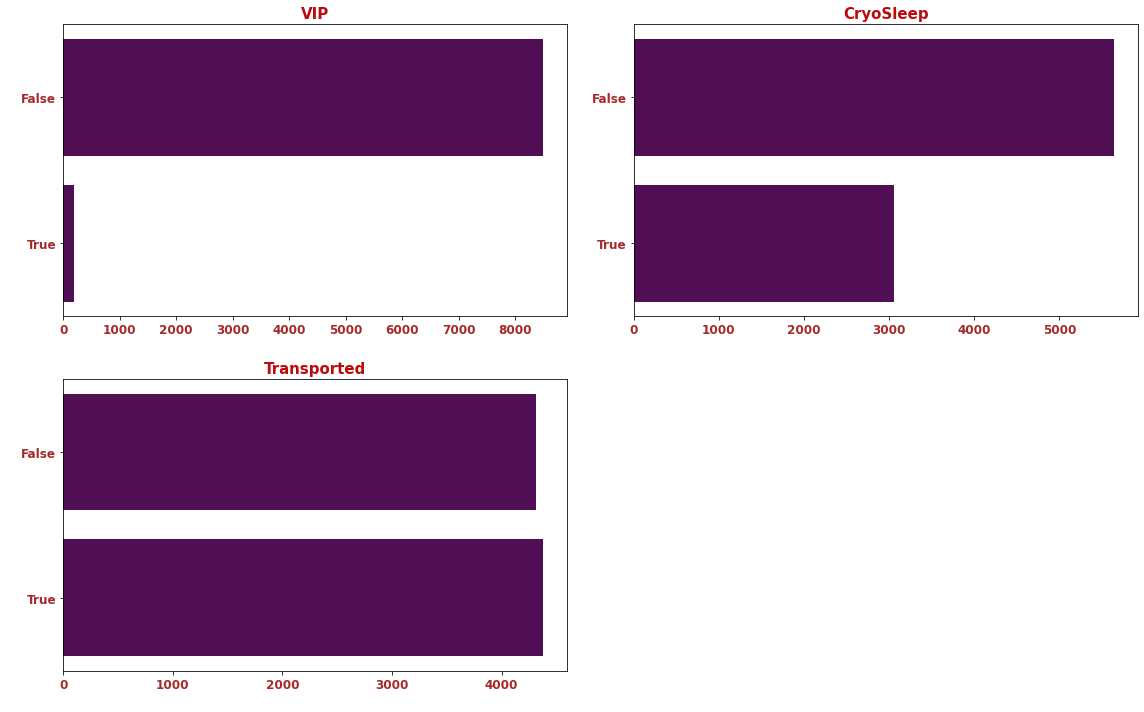

In [18]:
"""Univariate Analysis of Boolean Cols"""

plt.figure(figsize = (16,10))
for i, col in enumerate(bool_cols +['Transported']):
    plt.subplot(2,2,(i+1))
    sns.countplot(y = col,  data = train, color = '#5A045F' )
    plt.xticks(rotation = 0)
    plt.title(col, fontsize = 15, fontweight = 'bold', color = '#bd0b0b')
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.xticks(fontsize = 12, fontweight = 'bold', color = 'brown')
    plt.yticks(fontsize = 12, fontweight = 'bold', color = 'brown')
    plt.tight_layout();

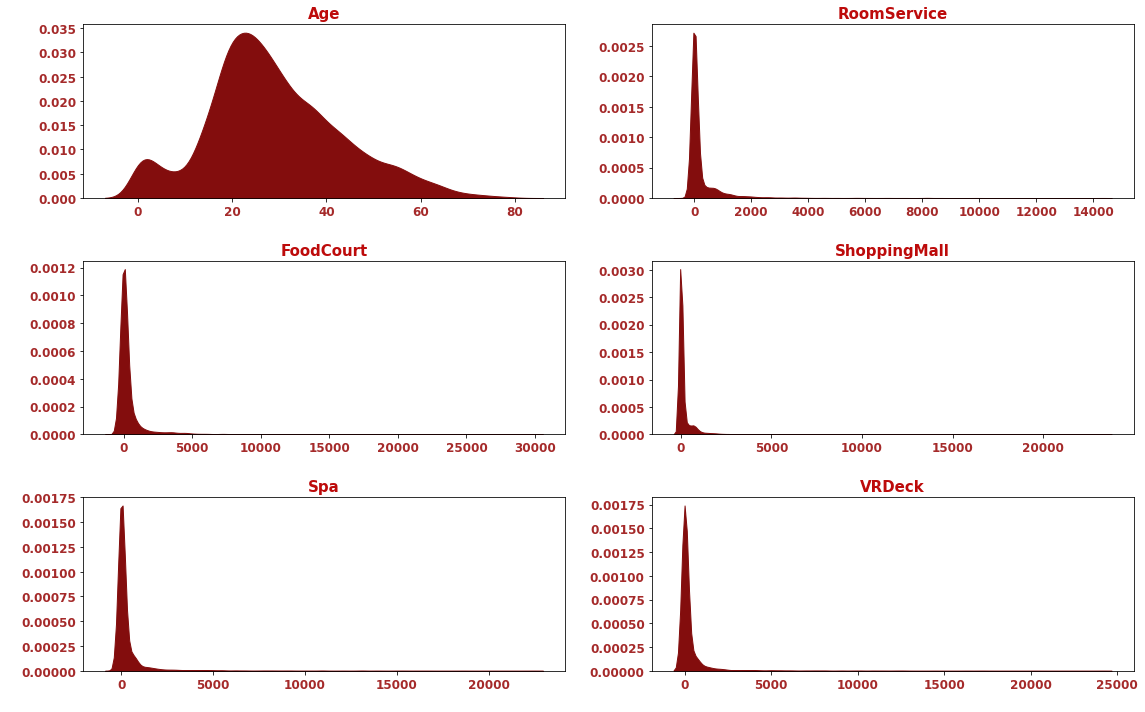

In [19]:
"""Univariate Analysis of Numerical Cols"""

plt.figure(figsize = (16,10))
for i, col in enumerate(col_num):
    plt.subplot(3,2,(i+1))
    sns.kdeplot(x= col,  data = train, color = '#830D0D', fill = '#830D0D', alpha = 1)
    plt.xticks(rotation = 0)
    plt.title(col, fontsize = 15, fontweight = 'bold', color = '#bd0b0b')
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.xticks(fontsize = 12, fontweight = 'bold', color = 'brown')
    plt.yticks(fontsize = 12, fontweight = 'bold', color = 'brown')
    plt.tight_layout();

### **<span style="color:#0918D5 ;">Observations:</span>**
- Many passangers are of 20s-30s age group. Travelling with children (age group: <5 years)
- Even in 2912, people dont spend too much while travelling, may be due to high price. We still will have exceptions in 2912, some passangers spending a lot (may be VIP).

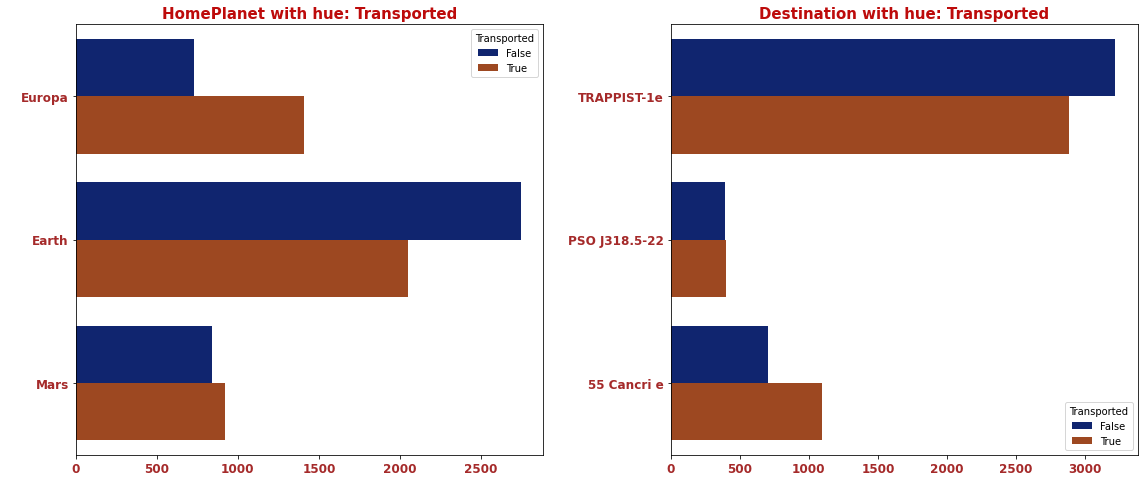

In [20]:
"""Bivariate Analysis of categorical variables"""

plt.figure(figsize = (16,7))
for i, col in enumerate(['HomePlanet', 'Destination']):
    plt.subplot(1,2,(i+1))
    sns.countplot(y = col,  data = train, palette = 'dark', hue = 'Transported' )
    plt.xticks(rotation = 0)
    plt.title(f"{col} with hue: Transported", fontsize = 15, fontweight = 'bold', color = '#bd0b0b')
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.xticks(fontsize = 12, fontweight = 'bold', color = 'brown')
    plt.yticks(fontsize = 12, fontweight = 'bold', color = 'brown')
    plt.tight_layout();

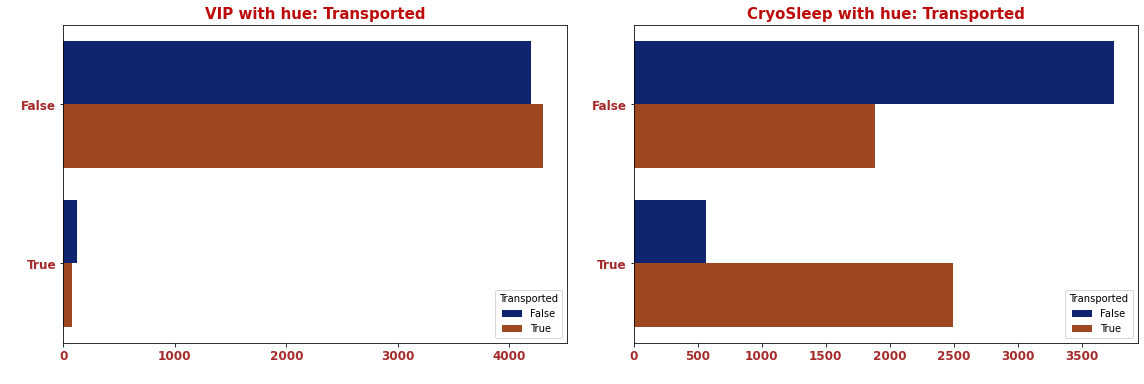

In [21]:
"""Bi-variate Analysis of Boolean Cols"""

plt.figure(figsize = (16,10))
for i, col in enumerate(bool_cols):
    plt.subplot(2,2,(i+1))
    sns.countplot(y = col,  data = train, hue = 'Transported', palette = 'dark' )
    plt.xticks(rotation = 0)
    plt.title(f"{col} with hue: Transported", fontsize = 15, fontweight = 'bold', color = '#bd0b0b')
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.xticks(fontsize = 12, fontweight = 'bold', color = 'brown')
    plt.yticks(fontsize = 12, fontweight = 'bold', color = 'brown')
    plt.tight_layout();

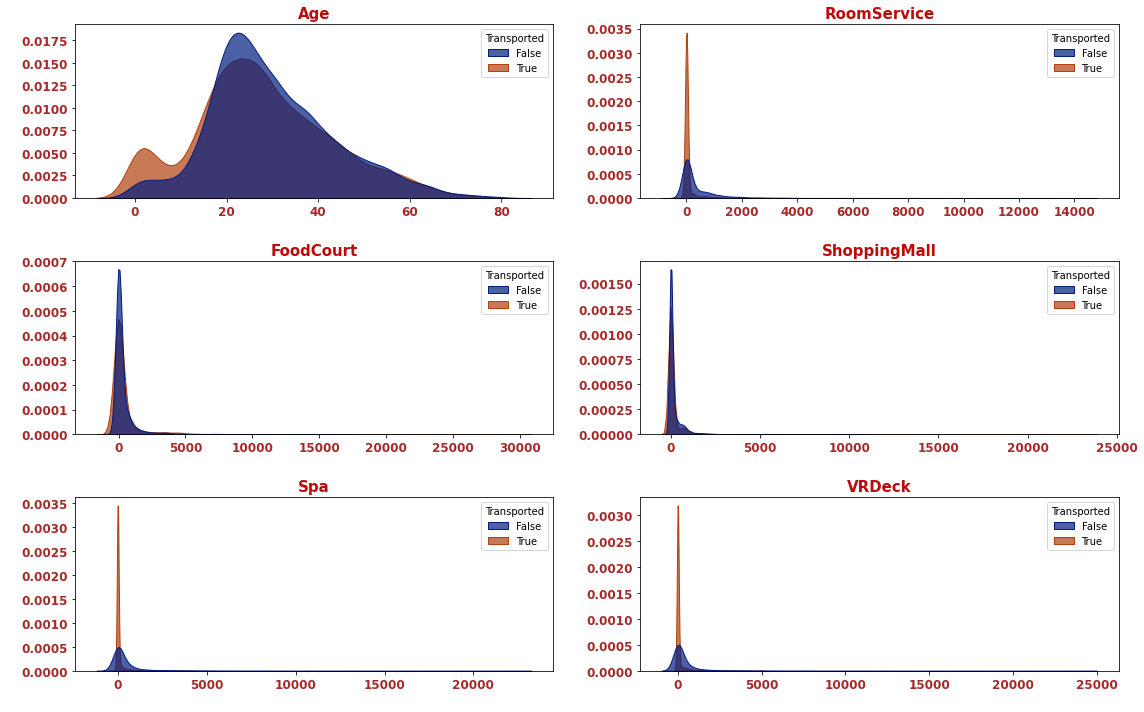

In [22]:
"""Bivariate Analysis of Numerical Cols"""

plt.figure(figsize = (16,10))
for i, col in enumerate(col_num):
    plt.subplot(3,2,(i+1))
    sns.kdeplot(x= col,  data = train, fill = 'Transported', hue = 'Transported',  palette = 'dark', alpha = 0.7)
    plt.xticks(rotation = 0)
    plt.title(col, fontsize = 15, fontweight = 'bold', color = '#bd0b0b')
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.xticks(fontsize = 12, fontweight = 'bold', color = 'brown')
    plt.yticks(fontsize = 12, fontweight = 'bold', color = 'brown')
    plt.tight_layout();

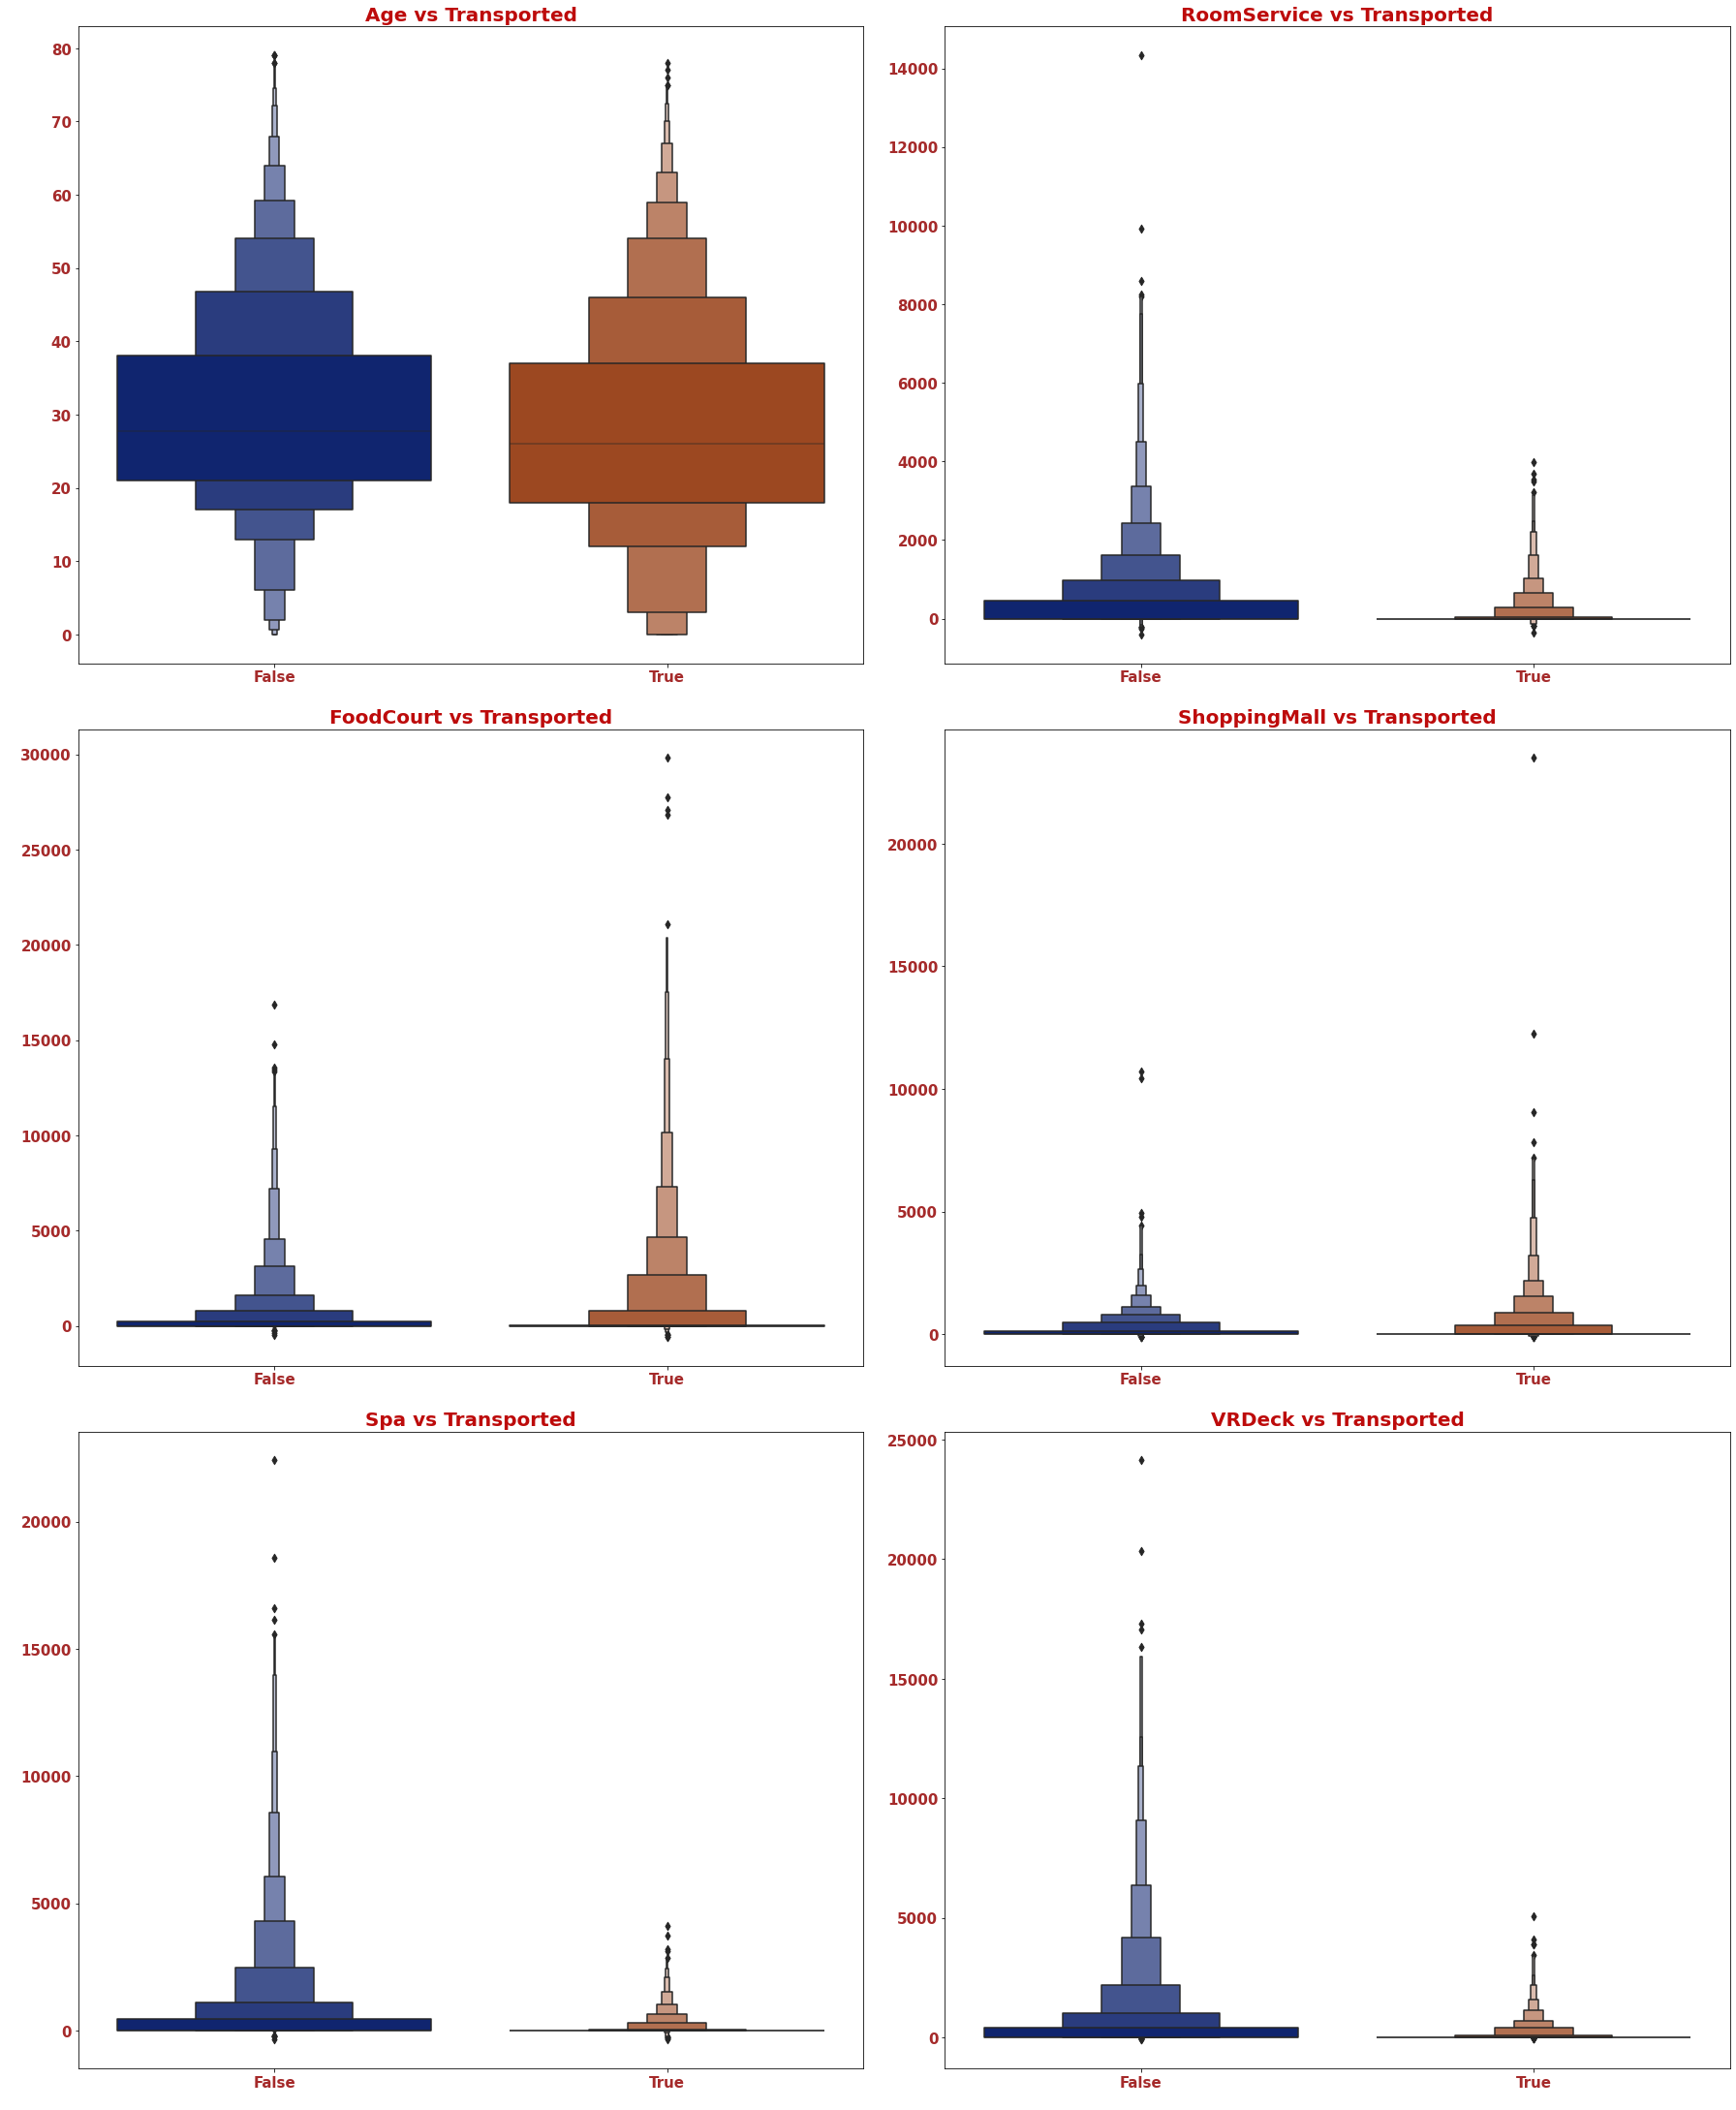

In [23]:
plt.figure(figsize = (25,50))

for i,col in enumerate(train[col_num].columns):
    plt.subplot(5,2,i+1)
    sns.boxenplot(x = 'Transported',y = col,  data = train,palette = 'dark')
    plt.xticks(rotation = 0)
    plt.title(f'{col} vs Transported', fontsize = 20, fontweight = 'bold', color = '#bd0b0b')
    plt.xlabel(" ")
    plt.ylabel(" ")
    # plt.legend(['No-Purchase', 'Purchase'])
    plt.xticks(fontsize = 15, fontweight = 'bold', color = 'brown')
    plt.yticks(fontsize = 15, fontweight = 'bold', color = 'brown')
    plt.tight_layout();
plt.show()

### **<span style="color:#0918D5 ;">Observations:</span>**
- Let's Visualize numerical features using Boxen Plots with hue as Transported.
- As per the data, Age of transported and Not Transported passenger has similar distribution. 
- Practically Amount spend in different attractions onboard doesn't determine anything about Transportion to another dimension due to collision. Still as per data it shows some correlation, BUT **correlation doesn't imply causation.** 
- **Understanding as per the Data given:**
    - Food Court area was impacted a lot Hence, number of people who got transported is more when people spend more time in Shopping mall.
    - Shopping mall is one more such area but not as impacted as Food Court but number of people who got transported is more when people spend more time in Shopping mall.
    - Room service (Room), Spa and VRDeck are areas with minimum effect and hence number of people who got transported is less when people spend more time in Room, Spa and VRDeck.

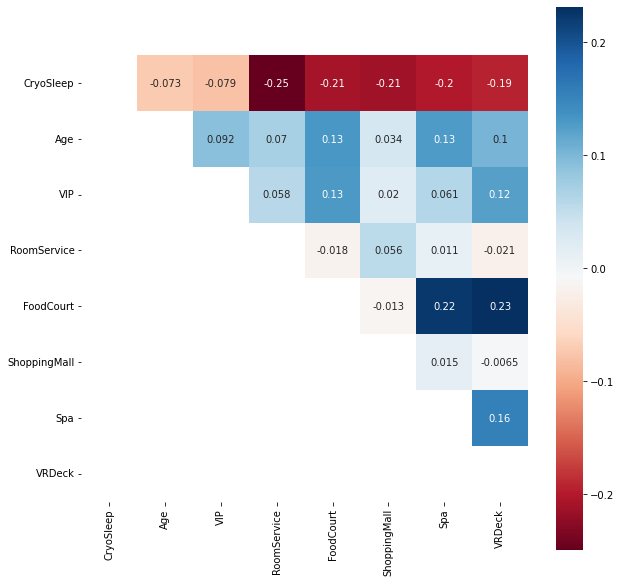

In [24]:
"""Correlation Matrix"""
corr_matrix=train.corr()
 
matrix = np.tril(corr_matrix)

plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix.T, mask=matrix, square=True, cmap = 'RdBu', annot = True, alpha = 1);

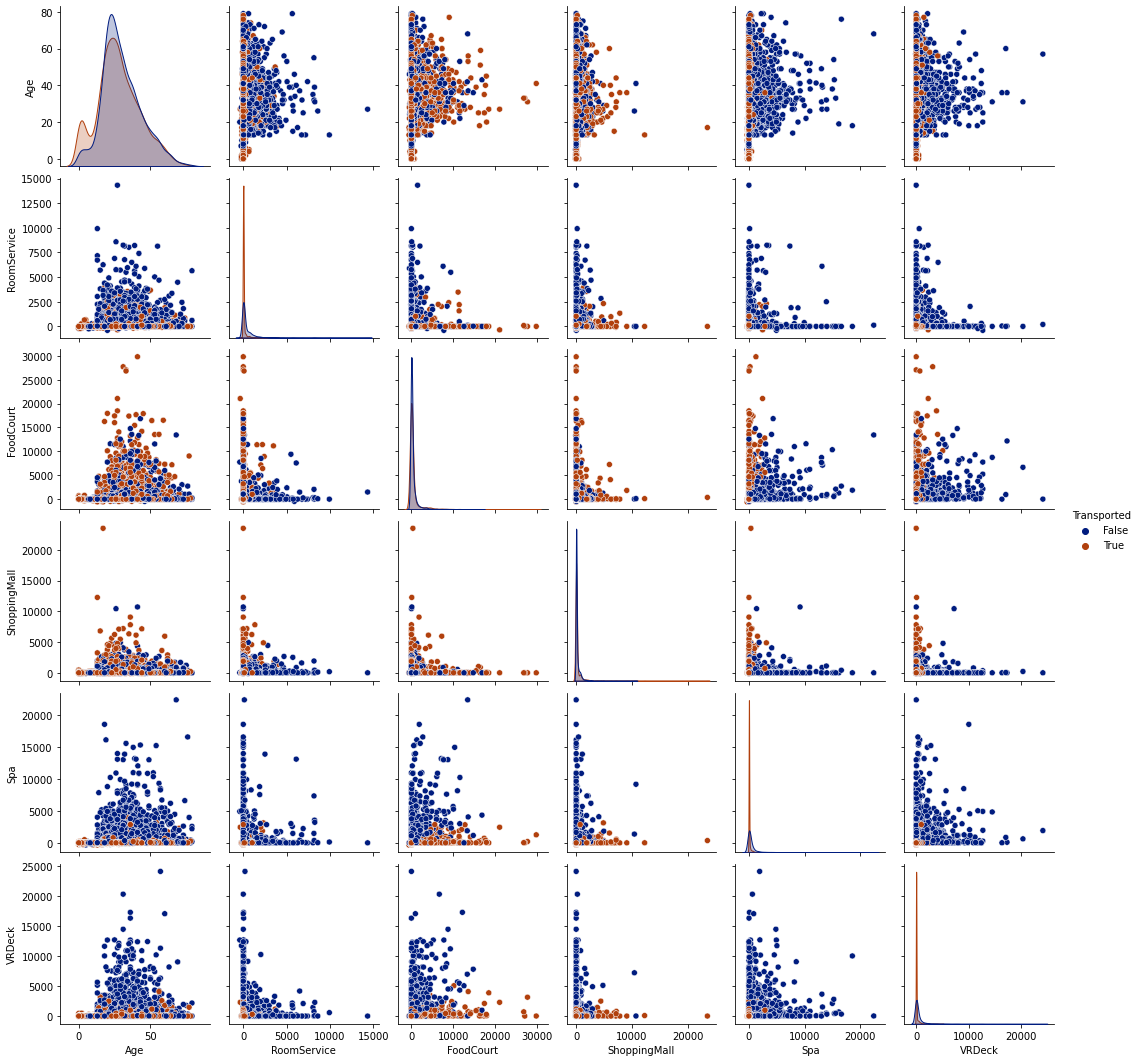

In [25]:
sns.pairplot(train[col_num + ['Transported']], hue = 'Transported', palette = 'dark')